In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain


#123

df=pd.read_excel('Example for data base.xlsx')



In [46]:
df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})

In [47]:
df = df.replace(r'\n',' ', regex=True) 

post_description=df["A short summary of the content- write briefly in your own words"]


In [48]:
df = df.rename(columns={"חותמת זמן":"Time stamp"})


In [49]:
from datetime import datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], errors='coerce') #This function convert the date text into dt.date type


תכנים לפי רשת - גרף עמודות ויזואלי לניטור התכנים לפי רשתות ולפי תקופה

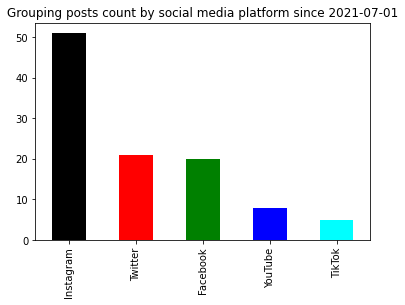

In [50]:
user_input = "2021-07-01"
the_user_target_date = df["Time stamp"]>user_input
new_df = df[the_user_target_date]
posts_in_platforms = new_df["Platform"].value_counts().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'],title = "Grouping posts count by social media platform since" + " " + user_input)

plt.savefig("posts_in_platforms.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)


In [51]:
import matplotlib.pyplot as plt


In [52]:
list = ["Anti-Zionist",
"Antisemitic",
"Non-Antisemitic"]

df = df.loc[df['Category'] .isin(list)]
#This line is keeping rows which have one of the categories


סוג התוכן- גרף עמודות שיפלטר את סוגי התכנים פר הרשת החברתית שמקבלת את הדוח

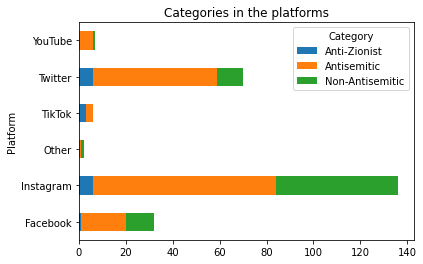

In [79]:

df_group_=df.groupby(['Category', 'Platform'])['Platform'].count().unstack('Category').fillna(0).astype(int)
categories_per_each_platform = df_group_.plot(kind='barh', stacked=True,mark_right = True ,title = "Categories in the platforms")


plt.savefig("categories_per_each_platform.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

In [54]:
df["Removed 1"]=df["Removed 1"].astype("str") 

def convert_to_category_remove_1(symbol):
    for letter in symbol:
        if letter == "X":
            return "Never"
        elif letter == "V":
            return "Second appeal"
        else:
            return "First appeal"

df["Post status"] = df["Removed 1"].apply(convert_to_category_remove_1)

status = df["Post status"]

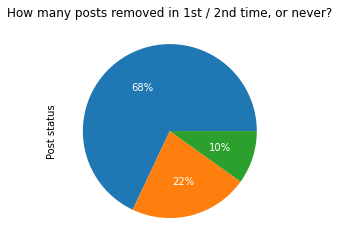

In [55]:
#Cheking the percentage of posts removing in general view

status = df["Post status"]

#df.groupby("Category").agg({status:"mean"})

category = df["Category"]


general_removal_view = status.value_counts() #get general info about the removal process of platforms

general_removal_view_plot = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts removed in 1st / 2nd time, or never?", textprops={'color':"w"}) 


plt.savefig("general_removal_view_plot.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

In [56]:
#Thus function renaming the removed columns for better understanding the data
df.rename(columns={'Removed':'First appeal', 'Removed 1': 'Second appeal'},inplace=True)

נתונים על הסרת התכנים- לפי סוג תוכן (כמה מכל סוג תוכן הוסרו וכמה נשארו)

In [57]:
df.groupby(['Category', 'Post status'])['Post status'].count().unstack('Post status').fillna(0).astype(int)

#set the columns in chronogical order ##

Post status,First appeal,Never,Second appeal
Category,,,
Anti-Zionist,2,14,0
Antisemitic,13,114,33
Non-Antisemitic,10,44,23


In [58]:
#This function is grouping the DF by the removal status & the category
outpot_category_removal_stats= df.groupby(['Post status', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['First appeal','Second appeal','Never'])

In [59]:
outpot_category_removal_stats_plot = outpot_category_removal_stats.astype("int")

dfi.export(outpot_category_removal_stats_plot,"outpot_category_removal_stats_plot.png")


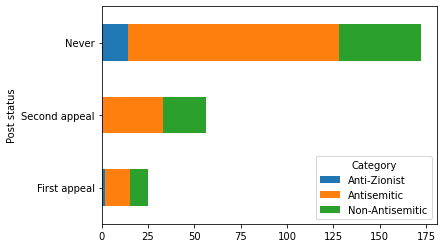

In [60]:
outpot_category_removal_stats_plot = outpot_category_removal_stats.plot(kind='barh', stacked=True,mark_right = True )

plt.savefig("outpot_category_removal_stats_plot.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)


אחוזים לפי כל רשת חברתית - כמה תכנים הוסרו מול כמה נשארו


In [61]:
removed = df["Post status"]!="Never"
not_removed = df["Post status"]=="Never"

content_description = df["A short summary of the content- write briefly in your own words"]

print(content_description[removed].count())
print(content_description[not_removed].count())

81
172


In [62]:
outpot_category_removal_stats_by_platform= df.groupby(['Post status', 'Platform'])['Platform'].count().unstack('Platform').fillna(0).astype(int).reindex(index = ['First appeal','Second appeal','Never'])

In [63]:
precentage_chart = outpot_category_removal_stats_by_platform/outpot_category_removal_stats_by_platform[outpot_category_removal_stats_by_platform.columns].sum()*100


In [64]:
precentage_chart_plot = precentage_chart.round(1).astype(str) +'%'

dfi.export(precentage_chart_plot,"precentage_chart_plot.png")


מילות מפתח בתכנים שהוסרו (בלבד)



In [65]:
#Tokenization process - 
#1. Lowercasing
#2. Translate all words, in any languge - to English
#3. Exclude Stop Words
#4. Identifaing n-grams
#5. Deal with hashtags
#6. Word frequency - think about how to deal with terms which appear multiple times via the text

In [66]:
posts_description = df["A short summary of the content- write briefly in your own words"]

In [67]:
only_removed_content = df["Post status"]!="Never"

In [68]:
only_removed_content = df[only_removed_content]


In [69]:
posts_description = only_removed_content["A short summary of the content- write briefly in your own words"]


In [70]:

posts_description = posts_description.str.lower()

In [71]:
posts_description = posts_description.str.replace('[^\w\s]','')

In [72]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
stop = stopwords.words('english')
new_list=["picture","video","pic","cartoon","photo","int","dtype"]
stop.extend(new_list)

desc_column_without_sw = posts_description.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [74]:
from collections import Counter


In [75]:
desc_column_without_sw = pd.Series(' '.join(desc_column_without_sw).split()).value_counts()[:15]
desc_column_without_sw



israel         45
jews           15
zionism        11
israeli         7
state           7
palestinian     6
accuse          6
nazi            6
flag            5
binyamin        5
genocide        5
terrorism       5
netanyahu       5
hitler          4
comparing       4
dtype: int64

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


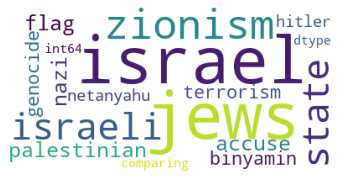

In [84]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(str(desc_column_without_sw))

plt.imshow(wordcloud)
plt.axis("off")


plt.savefig("wordcloud.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

In [112]:
from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF


pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Inner report', 0, 2, 'C')

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("posts_in_platforms.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)


pdf.image("categories_per_each_platform.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-10)

pdf.image("general_removal_view_plot.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.image("outpot_category_removal_stats_plot.png")

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(10)

pdf.image("precentage_chart_plot.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(20)

pdf.image("wordcloud.png")

pdf.output("Inner report.pdf")



''